In [1]:
#importing libraries to be used
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd
import libpysal as lp
import numpy as np
import shapely.geometry as geon
import mapclassify as mc
import seaborn as sbn

%matplotlib inline

C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\libpysal\examples\remotes.py:26: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


## Reading the Data

In [2]:
#reading data
unemployed= gpd.read_file("data.shp").to_crs(epsg=3857)

In [3]:
unemployed.head()

Shape_Leng  Shape_Area          ADM1_EN ADM1_PCODE       Sub_County  \
0    5.932315    0.884732          Baringo      KE030          Baringo   
1    2.922220    0.198099            Bomet      KE036            Bomet   
2    3.062486    0.245058          Bungoma      KE039          Bungoma   
3    2.670396    0.147178            Busia      KE040            Busia   
4    3.888933    0.244432  Elgeyo-Marakwet      KE028  Elgeyo-Marakwet   

       Total   Working  Seeking_Wo  Persons_ou  unemployed  ...  Households  \
0   567931.0  273503.0     28604.0    265820.0    0.133192  ...      142518   
1   762207.0  362007.0     16249.0    383946.0    0.078037  ...      187641   
2  1445029.0  629607.0     40627.0    774779.0    0.084676  ...      358796   
3   773817.0  351407.0     22325.0    400058.0    0.095904  ...      198152   
4   392451.0  172899.0     15407.0    204139.0    0.130649  ...       99861   

   Av_HH_Size  LandArea  Population  Populati_1  Pop_change  PKEY        x  \
0           5     10976          61      555561      111202     0  35.9458   
1           5      2531         346      724186      151503     1  35.2981   
2           5      3024         552     1630934       39636     2  34.6399   
3           5      1696         527      488075      405606     3  34.1933   
4           5      3032         150      369998       84482     4  35.5372   

          y                                           geometry  
0  0.671648  POLYGON ((3983445.275 184322.730, 3983563.715 ...  
1 -0.716584  POLYGON ((3948903.344 -44439.149, 3949442.511 ...  
2  0.751741  POLYGON ((3853899.537 122712.546, 3854028.609 ...  
3  0.389790  POLYGON ((3825045.633 86531.162, 3825128.998 8...  
4  0.802452  POLYGON ((3973902.752 142751.571, 3973869.356 ...  

[5 rows x 44 columns]

In [4]:
#checking projection
unemployed.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### checking the dimensionality of data

In [5]:
unemployed.shape

(47, 44)

### Plot

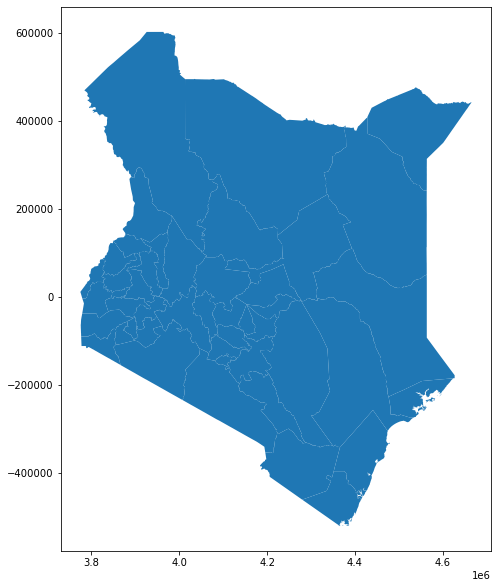

In [6]:
unemployed.plot(figsize=(10,10))

### Spatial Join 

In [7]:
#computing standard unemployment
rate_std = (unemployed['unemployed'] - unemployed['unemployed'].mean()) / unemployed['unemployed'].std()
#merging on a new data frame
new_df = unemployed.assign(rate_std=rate_std)
#reading the columns
new_df.columns


Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'Sub_County',
       'Total', 'Working', 'Seeking_Wo', 'Persons_ou', 'unemployed', 'Total_1',
       'Farming', 'Crop_Produ', 'Irrigation', 'Total_EduD', 'Pre_Primar',
       'Primary', 'Secondary', 'Technical', 'University', 'Adult_Basi',
       'Madrasa__D', 'None', 'Don_t_Know', 'Not_Stated', 'Edu_Attain',
       'County', 'Total_12', 'Male', 'Female', 'County_1', 'Total_Popu',
       'Male_popul', 'Female_pop', 'Households', 'Av_HH_Size', 'LandArea',
       'Population', 'Populati_1', 'Pop_change', 'PKEY', 'x', 'y', 'geometry',
       'rate_std'],
      dtype='object')

In [101]:
#computing labor force
laborf = unemployed['Working'] + unemployed['Seeking_Wo']
#merging on a new data frame
new_df = unemployed.assign(laborf=laborf)
#reading the columns
new_df.columns


Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'Sub_County',
       'Total', 'Working', 'Seeking_Wo', 'Persons_ou', 'unemployed', 'Total_1',
       'Farming', 'Crop_Produ', 'Irrigation', 'Total_EduD', 'Pre_Primar',
       'Primary', 'Secondary', 'Technical', 'University', 'Adult_Basi',
       'Madrasa__D', 'None', 'Don_t_Know', 'Not_Stated', 'Edu_Attain',
       'County', 'Total_12', 'Male', 'Female', 'County_1', 'Total_Popu',
       'Male_popul', 'Female_pop', 'Households', 'Av_HH_Size', 'LandArea',
       'Population', 'Populati_1', 'Pop_change', 'PKEY', 'x', 'y', 'geometry',
       'yb', 'k5ls', 'ward5', 'wardSwq', 'laborf'],
      dtype='object')

In [8]:
new_df

Shape_Leng  Shape_Area          ADM1_EN ADM1_PCODE       Sub_County  \
0     5.932315    0.884732          Baringo      KE030          Baringo   
1     2.922220    0.198099            Bomet      KE036            Bomet   
2     3.062486    0.245058          Bungoma      KE039          Bungoma   
3     2.670396    0.147178            Busia      KE040            Busia   
4     3.888933    0.244432  Elgeyo-Marakwet      KE028  Elgeyo-Marakwet   
5     3.386653    0.229414             Embu      KE014             Embu   
6    10.490922    3.542188          Garissa      KE007          Garissa   
7     3.373781    0.384444         Homa Bay      KE043         Homa Bay   
8    10.219754    2.063850           Isiolo      KE011           Isiolo   
9     7.412835    1.779183          Kajiado      KE034          Kajiado   
10    4.125304    0.244381         Kakamega      KE037         Kakamega   
11    3.541334    0.204179          Kericho      KE035          Kericho   
12    3.193175    0.206629           Kiambu      KE022           Kiambu   
13    5.744543    1.025127           Kilifi      KE003           Kilifi   
14    1.947362    0.119858        Kirinyaga      KE020        Kirinyaga   
15    1.692352    0.106739            Kisii      KE045            Kisii   
16    3.076286    0.216511           Kisumu      KE042           Kisumu   
17    9.074169    2.475338            Kitui      KE015            Kitui   
18    5.426097    0.673255            Kwale      KE002            Kwale   
19    5.381674    0.774807         Laikipia      KE031         Laikipia   
20    7.980883    0.491573             Lamu      KE005             Lamu   
21    6.081984    0.491164         Machakos      KE016         Machakos   
22    5.983774    0.664603          Makueni      KE017          Makueni   
23    7.282121    2.114345          Mandera      KE009          Mandera   
24   11.995362    6.185190         Marsabit      KE010         Marsabit   
25    4.400599    0.568086             Meru      KE012             Meru   
26    2.984960    0.255483           Migori      KE044           Migori   
27    1.820904    0.019024          Mombasa      KE001          Mombasa   
28    2.632397    0.205194         Murang'a      KE021         Murang'a   
29    1.658061    0.057496          Nairobi      KE047          Nairobi   
30    3.150416    0.230384            Nandi      KE029            Nandi   
31    5.827945    0.780230            Narok      KE033            Narok   
32    1.473206    0.072890          Nyamira      KE046          Nyamira   
33    3.571838    0.265398        Nyandarua      KE018        Nyandarua   
34    3.096591    0.270909            Nyeri      KE019            Nyeri   
35    8.004611    1.707814          Samburu      KE025          Samburu   
36    2.903781    0.286005            Siaya      KE041            Siaya   
37    5.677845    1.394198     Taita Taveta      KE006     Taita Taveta   
38   10.371749    3.185405       Tana River      KE004       Tana River   
39    3.171941    0.209683    Tharaka-Nithi      KE013    Tharaka-Nithi   
40    2.421398    0.201893      Trans Nzoia      KE026      Trans Nzoia   
41   14.387308    5.708426          Turkana      KE023          Turkana   
42    3.926051    0.275976      Uasin Gishu      KE027      Uasin Gishu   
43    1.396361    0.045533           Vihiga      KE038           Vihiga   
44   10.004932    4.606489            Wajir      KE008            Wajir   
45    4.733996    0.756344       West Pokot      KE024       West Pokot   
46   10.598716    1.283619           Nakuru      KE032           Nakuru   

        Total    Working  Seeking_Wo  Persons_ou  unemployed  ...  Av_HH_Size  \
0    567931.0   273503.0     28604.0    265820.0    0.133192  ...           5   
1    762207.0   362007.0     16249.0    383946.0    0.078037  ...           5   
2   1445029.0   629607.0     40627.0    774779.0    0.084676  ...           5   
3    773817.0   351407.0     22325.0    400058.0    0.095904  ...           5  

In [97]:
new_df.unemployed


0     0.133192
1     0.078037
2     0.084676
3     0.095904
4     0.130649
5     0.098839
6     0.478192
7     0.081820
8     0.245090
9     0.160949
10    0.094861
11    0.084711
12    0.142505
13    0.152359
14    0.078514
15    0.101607
16    0.111699
17    0.120744
18    0.164472
19    0.115861
20    0.132155
21    0.143793
22    0.122333
23    0.285240
24    0.285042
25    0.143330
26    0.098464
27    0.136011
28    0.094194
29    0.110695
30    0.107324
31    0.067668
32    0.067349
33    0.054144
34    0.091466
35    0.184611
36    0.078244
37    0.130363
38    0.247177
39    0.107382
40    0.112825
41    0.395147
42    0.137584
43    0.076979
44    0.422433
45    0.141661
46    0.102966
Name: unemployed, dtype: float64

In [10]:
new_df['unemployed'].sum()

6.831261

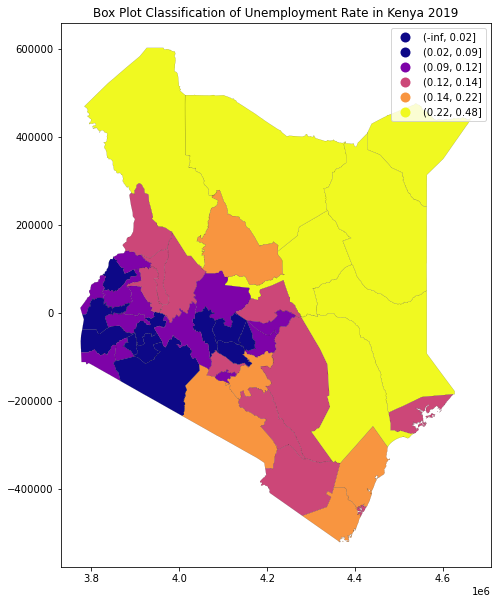

In [11]:
#unemployment rate
fig, ax= plt.subplots(1,figsize=(12,10),subplot_kw={'aspect':'equal'})
new_df.plot(ax=ax,column='unemployed',\
                                 scheme='BoxPlot',cmap='plasma', linewidth=0.1,\
                                edgecolor='k',legend=True )

plt.title("Box Plot Classification of Unemployment Rate in Kenya 2019") 
plt.savefig('img1')
plt.show()

C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


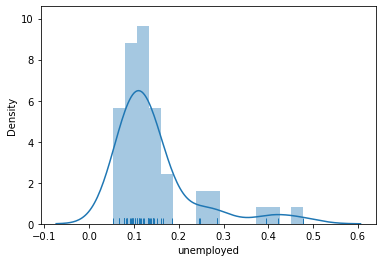

In [12]:
#graphical distribution of unemployment rate value
sbn.distplot(new_df['unemployed'], rug=True);

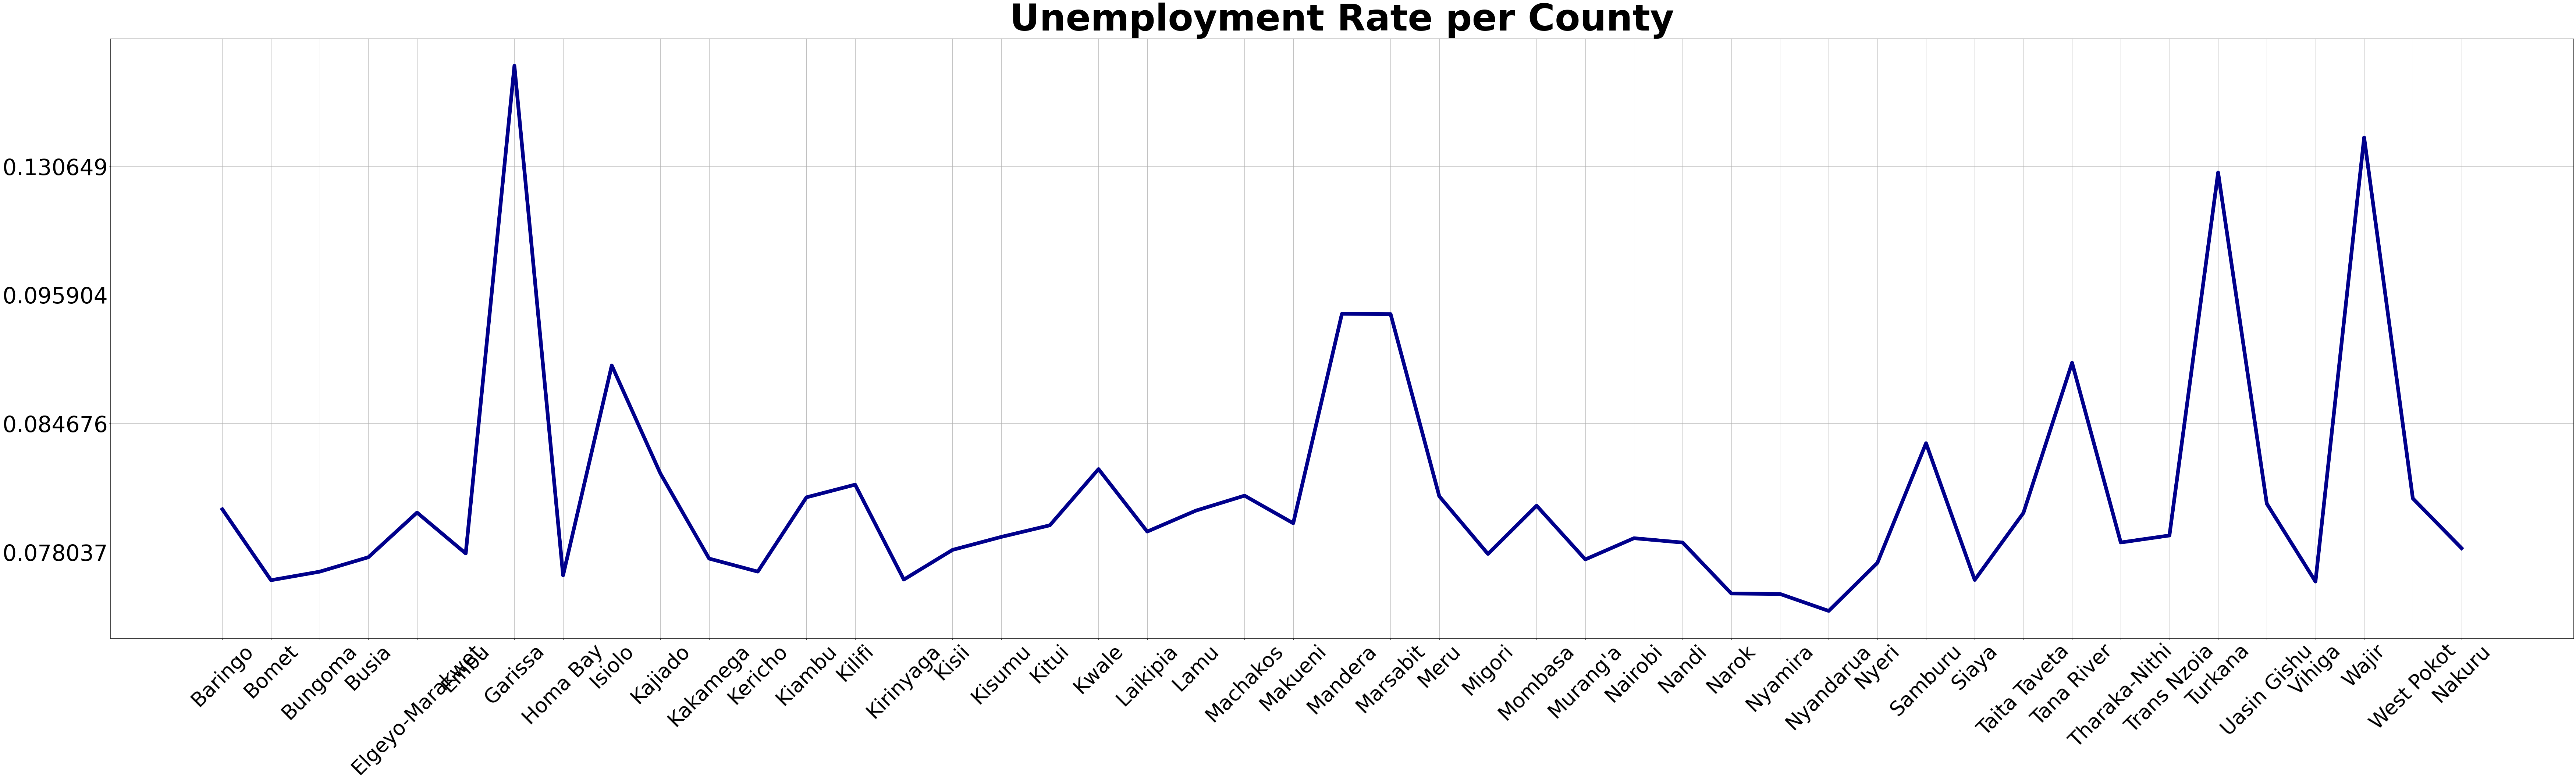

In [13]:
x=new_df['ADM1_EN']
y=new_df['unemployed']
f, ax = plt.subplots(1, figsize=(120, 30))

# Plot values
plt.plot(x, y,color='darkblue',linewidth=10)
ax.set_xticklabels(x,fontsize=55)
ax.set_yticklabels(y,fontsize=60)
plt.grid(True)
fc = {'fontsize':100,'fontweight':'bold','color':'k'}
plt.title('Unemployment Rate per County',fontdict=fc)
plt.setp(ax.get_xticklabels(),rotation=45)

plt.show()

the distplot combines both histogram and kernel density and reflect a Right Skewed Distribution on Unemployement persons.
The histogram and density gives us the sense of 'value' distribution.

## Choroplepth Mapping
Use of choropleth mapping techniques in attribute outlier detection by employing the ‘best’ classification mechanism on the attribute being investigated and using a measure of fit to know the best classifier for the attributes under investigation. 


Default Choropleth mapping of the attribute values

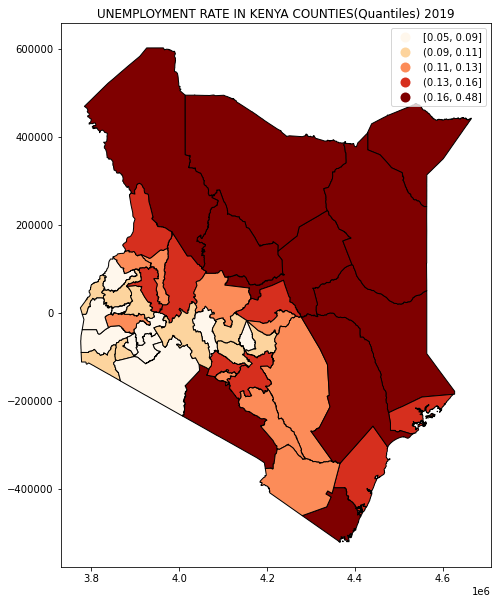

In [14]:
fig, ax=plt.subplots(figsize=(10,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='unemployed',scheme='Quantiles',k=5, edgecolor='k',cmap='OrRd',legend=True,ax=ax)
plt.title('UNEMPLOYMENT RATE IN KENYA COUNTIES(Quantiles) 2019')
plt.savefig('quantiles')

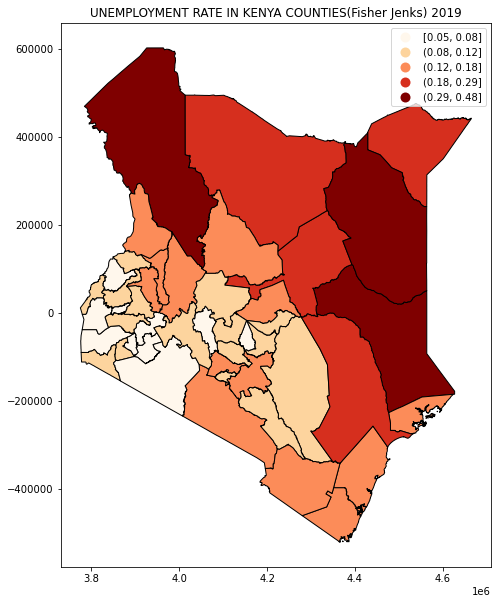

In [15]:
fig, ax=plt.subplots(figsize=(10,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='unemployed',scheme='fisherjenks',k=5,edgecolor='k', cmap='OrRd',legend=True,ax=ax)
plt.title('UNEMPLOYMENT RATE IN KENYA COUNTIES(Fisher Jenks) 2019')
plt.savefig('fisherjenks')

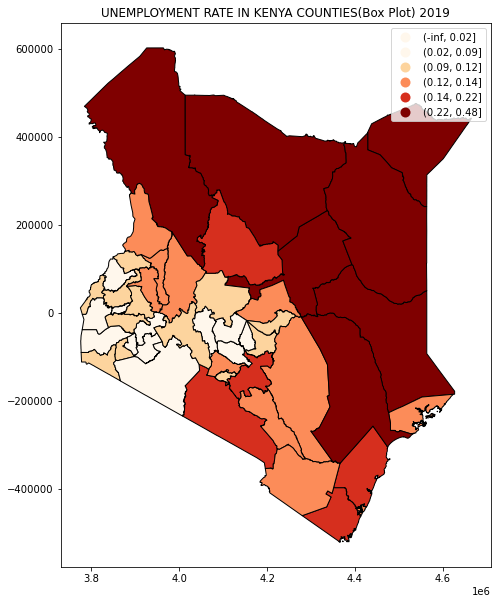

In [16]:
fig, ax=plt.subplots(figsize=(8,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='unemployed',scheme='boxplot',k=5,edgecolor='k', cmap='OrRd',legend=True,ax=ax)
plt.title('UNEMPLOYMENT RATE IN KENYA COUNTIES(Box Plot) 2019')
plt.savefig('boxplot')

Using of different color ramps and classification scheme to show the resulting visualizations

In [17]:
mc.CLASSIFIERS

('BoxPlot',
 'EqualInterval',
 'FisherJenks',
 'FisherJenksSampled',
 'HeadTailBreaks',
 'JenksCaspall',
 'JenksCaspallForced',
 'JenksCaspallSampled',
 'MaxP',
 'MaximumBreaks',
 'NaturalBreaks',
 'Quantiles',
 'Percentiles',
 'StdMean',
 'UserDefined')

In [18]:
#the width of each interval class is equal
x=new_df['unemployed']
ei5=mc.EqualInterval(x,k=5)
ei5

EqualInterval       

  Interval     Count
--------------------
[0.05, 0.14] |    32
(0.14, 0.22] |     8
(0.22, 0.31] |     4
(0.31, 0.39] |     0
(0.39, 0.48] |     3

In [19]:
#the count of the number of observations in a class is equal
x=new_df['unemployed']
q5=mc.Quantiles(x,k=5)
q5

Quantiles           

  Interval     Count
--------------------
[0.05, 0.09] |    10
(0.09, 0.11] |     9
(0.11, 0.13] |     9
(0.13, 0.16] |     9
(0.16, 0.48] |    10

In [20]:
#min the heterogenity for the values of unemployement grouped together and max the difference between classes
x=new_df['unemployed']
f5=mc.FisherJenks(x,k=5)
f5

FisherJenks         

  Interval     Count
--------------------
[0.05, 0.08] |    10
(0.08, 0.12] |    16
(0.12, 0.18] |    14
(0.18, 0.29] |     4
(0.29, 0.48] |     3

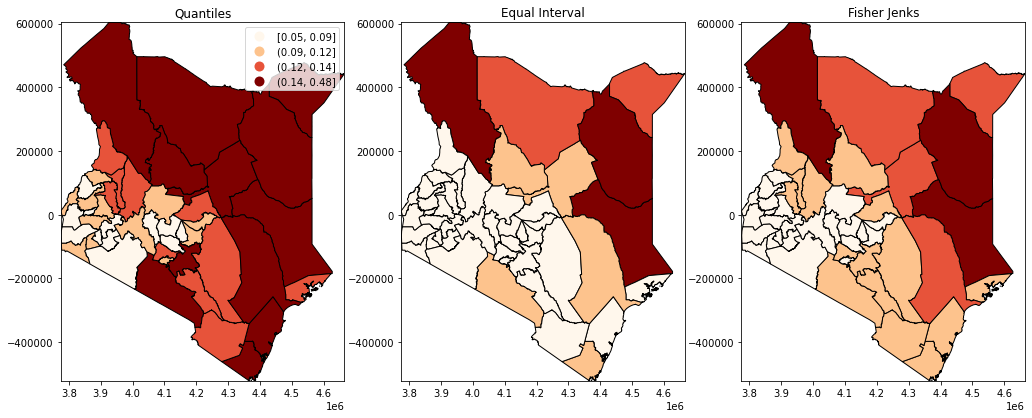

<Figure size 432x288 with 0 Axes>

In [21]:
f, ax=plt.subplots(1,3, figsize=(2.16*8, 10))
new_df.plot(column='unemployed', ax=ax[0], edgecolor='k',
           scheme='quantiles',cmap='OrRd', k=4, legend=True)
ax[0].axis(new_df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title('Quantiles')
new_df.plot(column='unemployed', ax=ax[1], edgecolor='k',
           scheme='equalinterval',cmap='OrRd', k=4)
ax[1].axis(new_df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title('Equal Interval')
new_df.plot(column='unemployed', ax=ax[2], edgecolor='k',
           scheme='fisherjenks',cmap='OrRd', k=4)
ax[2].axis(new_df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title('Fisher Jenks')
#ax[0].axis('off')
#ax[1].axis('off')
#ax[2].axis('off')
plt.show()
plt.savefig('choropleths')

Using of different color ramps and classification scheme to show the resulting visualizations

## Selecting a classification based on fit
One such measure of fit is the Absolute Deviation around Class. Mean(ADCM) in Pysal which tests the different classifiers in Pysal’s Mapclassify having the same number of classes, such that differences between data belonging to different groups should be as large as possible and differences between data belonging in the same class to be as small as possible. 
lets use this to compare all k=5 classifiers

In [22]:
bx=mc.BoxPlot(x)
f5=mc.FisherJenks(x,k=5)
q5=mc.Quantiles(x,k=5)
ei5=mc.EqualInterval(x,k=5)
fits=[c.adcm for c in [bx,f5, q5 ,ei5]]
fits

[0.802346, 0.505814, 1.066387, 0.839682]

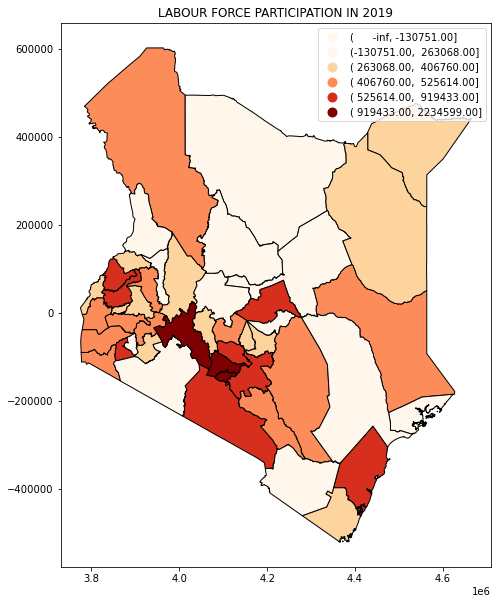

In [105]:
fig, ax=plt.subplots(figsize=(8,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='laborf',scheme='boxplot',k=5,edgecolor='k', cmap='OrRd',legend=True,ax=ax)
plt.title('LABOUR FORCE PARTICIPATION IN 2019')
plt.savefig('boxplot')

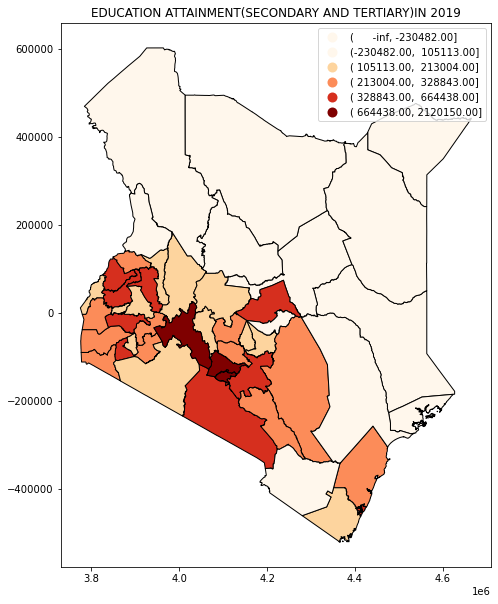

In [106]:
fig, ax=plt.subplots(figsize=(8,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='Edu_Attain',scheme='boxplot',k=5,edgecolor='k', cmap='OrRd',legend=True,ax=ax)
plt.title('EDUCATION ATTAINMENT(SECONDARY AND TERTIARY)IN 2019')
plt.savefig('boxplot')

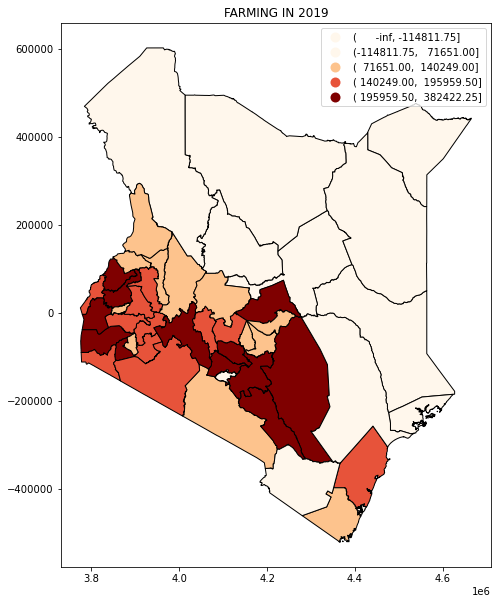

In [107]:
fig, ax=plt.subplots(figsize=(8,10),subplot_kw={'aspect':'equal'})
new_df.plot(column='Farming',scheme='boxplot',k=5,edgecolor='k', cmap='OrRd',legend=True,ax=ax)
plt.title('FARMING IN 2019')
plt.savefig('boxplot')

## Spatial Weight Matrices 
The concept of spatial weights investigates the spatial relationships that arise from spatial data. The analysis of spatial auto-correlation and spatial outliers depends on spatial weights to establish the relationships of the spatial data structures over space. The concept can be exploited as contiguity based


## Contiguity
Contiguity weights or adjacency matrices are one common representation of spatial relationships that spring in mind when modelling how polygons relate to one another by define spatial weights given their topology. In this representation, objects are considered 'near' when they touch, and far  when they dont. Adjacency is considered as a 'binary' relationship, so all polygons that are near to one another as they are to any other near polygon
##	Queen Weights:
under this criteria, two observations only need to share a vortex that is a single point in an area unit, to be considered as neighbors. This also means that the Queen weights can share an edge or a vertex with its neighbors. The results of the computation is a matrix with binary values, that is either one or zero to indicate whether the locations are neighbors or not. 

In [26]:
wq = lp.weights.Queen.from_dataframe(new_df)#applying Queen Contiguity matrix 

In [27]:
wq.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0,

Given this,we can plot the adjacency graph for the polygons showed above as another layer in the plot

In [28]:
queen_card = pd.Series(wq.cardinalities) 
queen_card.head()

0    8
1    5
2    3
3    3
4    4
dtype: int64

C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


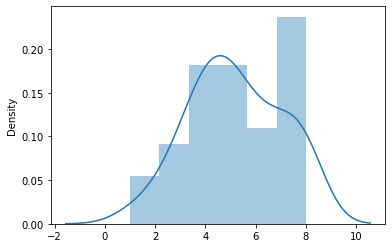

In [29]:
 sbn.distplot(queen_card, bins=6)
plt.savefig('adjacencyplot')

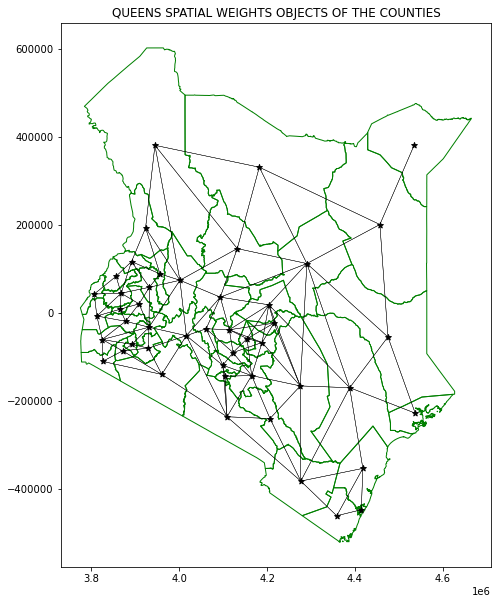

In [30]:
#ploting of the contiguity of polygons
fig,ax = plt.subplots(1,figsize=(10,10))
new_df.plot(ax=ax,facecolor='none',edgecolor='g',linewidth=1.0)
wq.plot(new_df,ax=ax,node_kws=dict(marker='*'),edge_kws=dict(linewidth=0.4))
ax.set_title('QUEENS SPATIAL WEIGHTS OBJECTS OF THE COUNTIES')
plt.savefig('adjacency')

In [31]:
wq.islands#checking foor disconnected polygons

[]


## Spatial Weight Transformations 
When computed, spatial weights are usually in their binary state. This means that they have to be standardized in order to comply with a certain set of conditions.

## Row standardization 
Works by taking the sum of the given weights and dividing them by the row sum so that the sum in a row adds up to 1. This is the default standardization used in Pysal. 

In [32]:
wq.transform='r'# row standardization

## Spatial Lag
Spatial lag puts together attribute similarity and spatial similarity. With spatial weights at hand we can construct a new variable which is in essence a weighted average of the variables observed at the neighboring locations. 
The neighboring locations are obtained from the spatial weights object and the attribute or phenomena under investigation provided by the initial data set.
The attribute or explanatory variable should also be standardized before being used to compute spatial lag .This is accomplished by subtracting the mean of the explanatory variable from the explanatory variable and dividing by its standard deviation. 

In [33]:
y=new_df['unemployed']
ylag=lp.weights.lag_spatial(wq,y)

In [34]:
y

0     0.133192
1     0.078037
2     0.084676
3     0.095904
4     0.130649
5     0.098839
6     0.478192
7     0.081820
8     0.245090
9     0.160949
10    0.094861
11    0.084711
12    0.142505
13    0.152359
14    0.078514
15    0.101607
16    0.111699
17    0.120744
18    0.164472
19    0.115861
20    0.132155
21    0.143793
22    0.122333
23    0.285240
24    0.285042
25    0.143330
26    0.098464
27    0.136011
28    0.094194
29    0.110695
30    0.107324
31    0.067668
32    0.067349
33    0.054144
34    0.091466
35    0.184611
36    0.078244
37    0.130363
38    0.247177
39    0.107382
40    0.112825
41    0.395147
42    0.137584
43    0.076979
44    0.422433
45    0.141661
46    0.102966
Name: unemployed, dtype: float64

In [35]:
ylag
new_df.assign(spalag=ylag)

Shape_Leng  Shape_Area          ADM1_EN ADM1_PCODE       Sub_County  \
0     5.932315    0.884732          Baringo      KE030          Baringo   
1     2.922220    0.198099            Bomet      KE036            Bomet   
2     3.062486    0.245058          Bungoma      KE039          Bungoma   
3     2.670396    0.147178            Busia      KE040            Busia   
4     3.888933    0.244432  Elgeyo-Marakwet      KE028  Elgeyo-Marakwet   
5     3.386653    0.229414             Embu      KE014             Embu   
6    10.490922    3.542188          Garissa      KE007          Garissa   
7     3.373781    0.384444         Homa Bay      KE043         Homa Bay   
8    10.219754    2.063850           Isiolo      KE011           Isiolo   
9     7.412835    1.779183          Kajiado      KE034          Kajiado   
10    4.125304    0.244381         Kakamega      KE037         Kakamega   
11    3.541334    0.204179          Kericho      KE035          Kericho   
12    3.193175    0.206629           Kiambu      KE022           Kiambu   
13    5.744543    1.025127           Kilifi      KE003           Kilifi   
14    1.947362    0.119858        Kirinyaga      KE020        Kirinyaga   
15    1.692352    0.106739            Kisii      KE045            Kisii   
16    3.076286    0.216511           Kisumu      KE042           Kisumu   
17    9.074169    2.475338            Kitui      KE015            Kitui   
18    5.426097    0.673255            Kwale      KE002            Kwale   
19    5.381674    0.774807         Laikipia      KE031         Laikipia   
20    7.980883    0.491573             Lamu      KE005             Lamu   
21    6.081984    0.491164         Machakos      KE016         Machakos   
22    5.983774    0.664603          Makueni      KE017          Makueni   
23    7.282121    2.114345          Mandera      KE009          Mandera   
24   11.995362    6.185190         Marsabit      KE010         Marsabit   
25    4.400599    0.568086             Meru      KE012             Meru   
26    2.984960    0.255483           Migori      KE044           Migori   
27    1.820904    0.019024          Mombasa      KE001          Mombasa   
28    2.632397    0.205194         Murang'a      KE021         Murang'a   
29    1.658061    0.057496          Nairobi      KE047          Nairobi   
30    3.150416    0.230384            Nandi      KE029            Nandi   
31    5.827945    0.780230            Narok      KE033            Narok   
32    1.473206    0.072890          Nyamira      KE046          Nyamira   
33    3.571838    0.265398        Nyandarua      KE018        Nyandarua   
34    3.096591    0.270909            Nyeri      KE019            Nyeri   
35    8.004611    1.707814          Samburu      KE025          Samburu   
36    2.903781    0.286005            Siaya      KE041            Siaya   
37    5.677845    1.394198     Taita Taveta      KE006     Taita Taveta   
38   10.371749    3.185405       Tana River      KE004       Tana River   
39    3.171941    0.209683    Tharaka-Nithi      KE013    Tharaka-Nithi   
40    2.421398    0.201893      Trans Nzoia      KE026      Trans Nzoia   
41   14.387308    5.708426          Turkana      KE023          Turkana   
42    3.926051    0.275976      Uasin Gishu      KE027      Uasin Gishu   
43    1.396361    0.045533           Vihiga      KE038           Vihiga   
44   10.004932    4.606489            Wajir      KE008            Wajir   
45    4.733996    0.756344       West Pokot      KE024       West Pokot   
46   10.598716    1.283619           Nakuru      KE032           Nakuru   

        Total    Working  Seeking_Wo  Persons_ou  unemployed  ...  LandArea  \
0    567931.0   273503.0     28604.0    265820.0    0.133192  ...     10976   
1    762207.0   362007.0     16249.0    383946.0    0.078037  ...      2531   
2   1445029.0   629607.0     40627.0    774779.0    0.084676  ...      3024   
3    773817.0   351407.0     22325.0    400058.0    0.095904  ...      1696   
4    392

In [36]:
new_df = new_df.assign(ylag=ylag)
mc.BoxPlot(new_df['ylag'])

BoxPlot             

  Interval     Count
--------------------
(-inf, 0.01] |     0
(0.01, 0.10] |    12
(0.10, 0.12] |    12
(0.12, 0.16] |    11
(0.16, 0.25] |     7
(0.25, 0.42] |     5

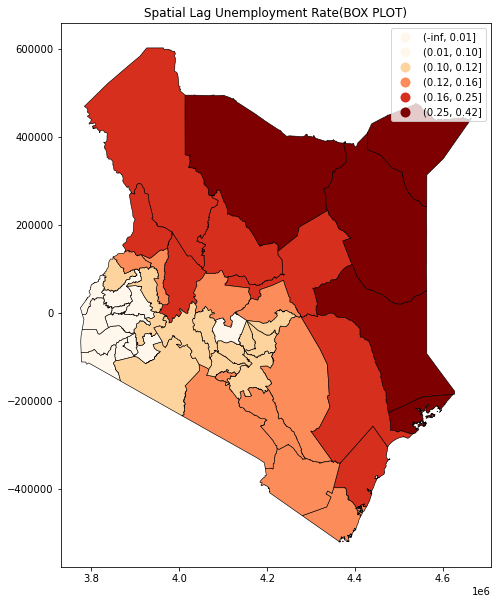

In [37]:
fig, ax= plt.subplots(1,figsize=(12,10),subplot_kw={'aspect':'equal'})
new_df.plot(ax=ax,column='ylag',\
                                 scheme='BoxPlot',cmap='OrRd', linewidth=0.6,\
                                edgecolor='k',legend=True)
#ax.set_axis_off()
plt.title("Spatial Lag Unemployment Rate(BOX PLOT)")
plt.savefig('spatial lag')
plt.show()

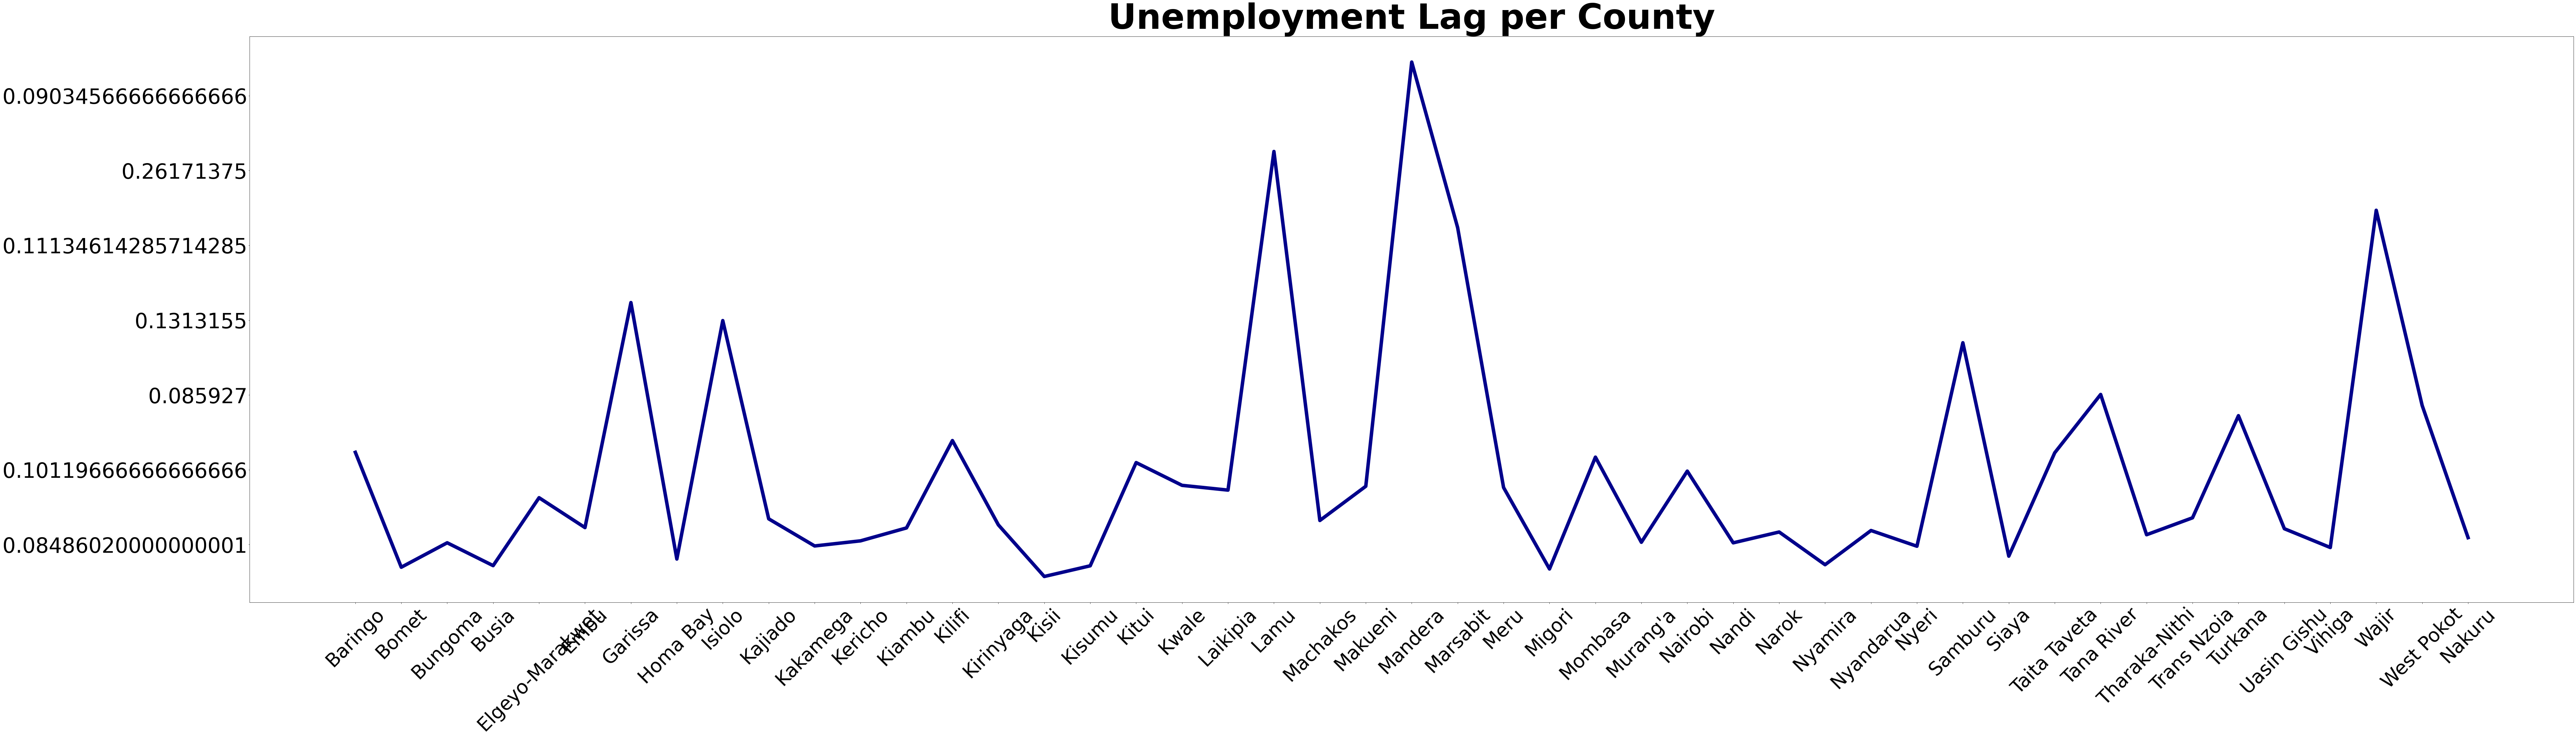

In [38]:
x=new_df['ADM1_EN']
y=ylag
f, ax = plt.subplots(1, figsize=(120, 30))

# Plot values
plt.plot(x, y,color='darkblue',linewidth=10)
ax.set_xticklabels(x,fontsize=55)
ax.set_yticklabels(y,fontsize=60)
#plt.grid(True)
fc = {'fontsize':100,'fontweight':'bold','color':'k'}
plt.title('Unemployment Lag per County',fontdict=fc)
plt.setp(ax.get_xticklabels(),rotation=45)

plt.show()


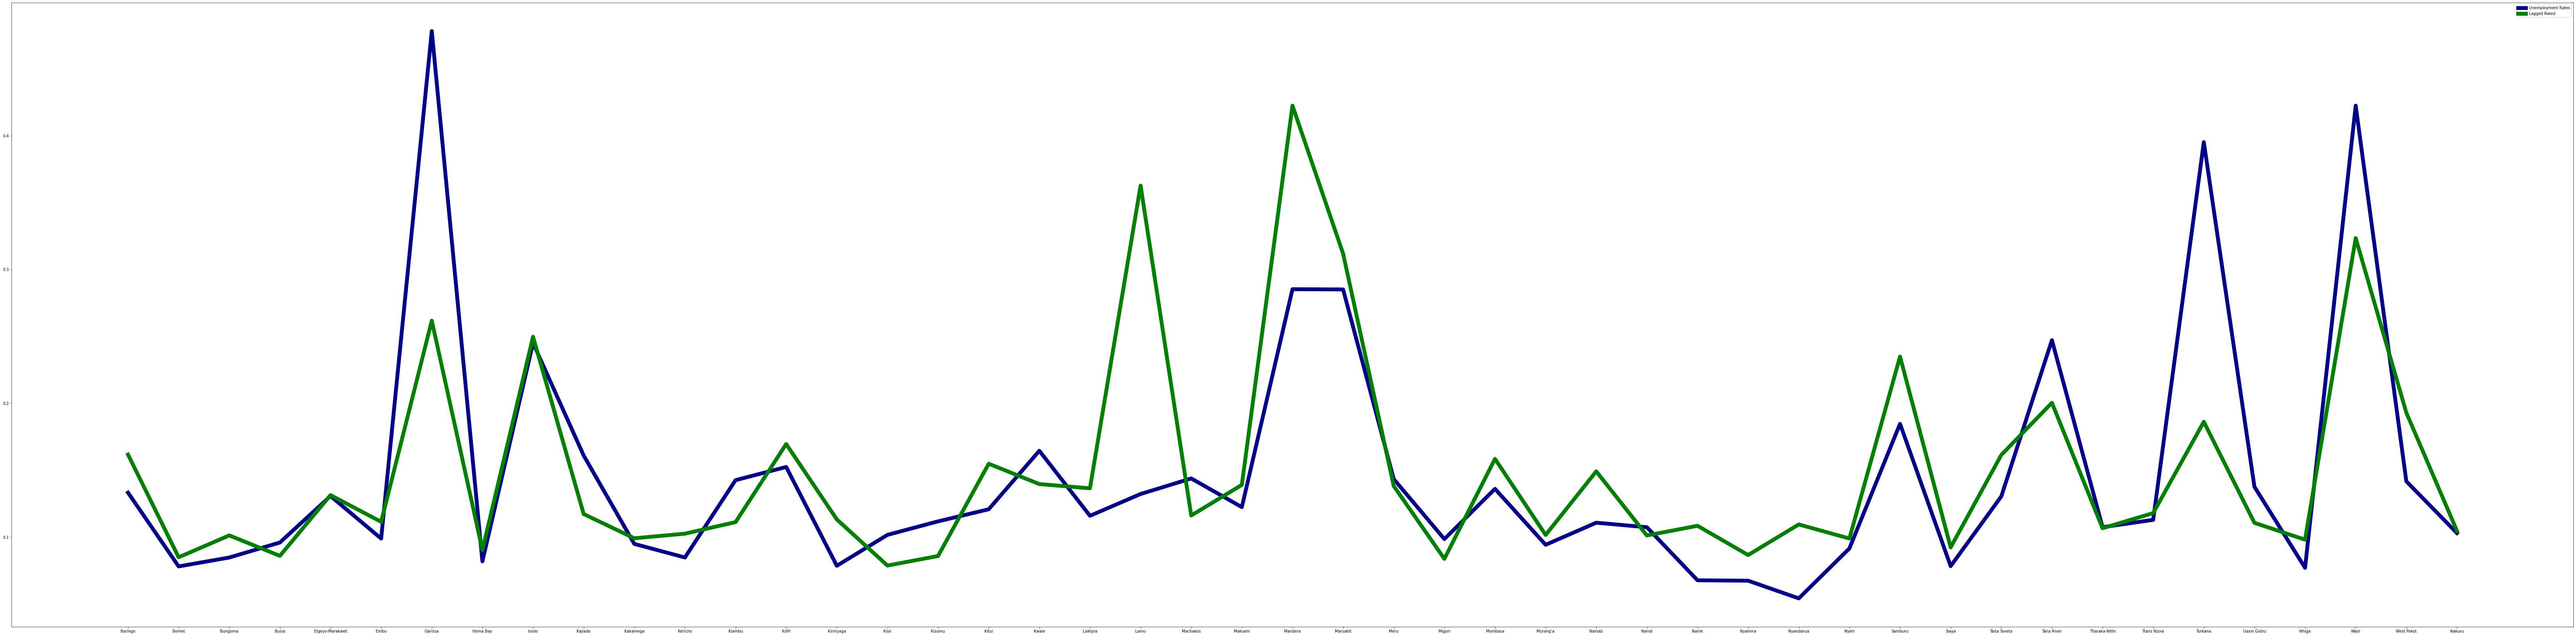

In [39]:
y1 = new_df['unemployed']
y2 = new_df['ylag']

x = new_df['ADM1_EN']

fig, ax = plt.subplots(1,figsize=(120, 30))
plt.plot(x,y1,label='Unemployment Rates',color='darkblue',linewidth=10)
plt.plot(x,y2,label='Lagged Rated',linewidth=10,color='green')
plt.legend()
plt.show()

In [40]:
new_df.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_PCODE', 'Sub_County',
       'Total', 'Working', 'Seeking_Wo', 'Persons_ou', 'unemployed', 'Total_1',
       'Farming', 'Crop_Produ', 'Irrigation', 'Total_EduD', 'Pre_Primar',
       'Primary', 'Secondary', 'Technical', 'University', 'Adult_Basi',
       'Madrasa__D', 'None', 'Don_t_Know', 'Not_Stated', 'Edu_Attain',
       'County', 'Total_12', 'Male', 'Female', 'County_1', 'Total_Popu',
       'Male_popul', 'Female_pop', 'Households', 'Av_HH_Size', 'LandArea',
       'Population', 'Populati_1', 'Pop_change', 'PKEY', 'x', 'y', 'geometry',
       'rate_std', 'ylag'],
      dtype='object')

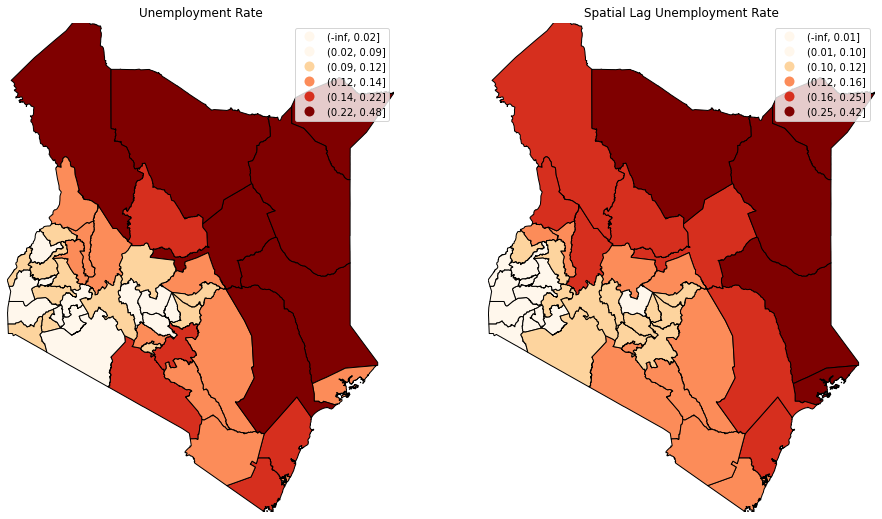

<Figure size 432x288 with 0 Axes>

In [41]:
new_df['lag_unemployment']=ylag
f, ax=plt.subplots(1,2, figsize=(3.16*5,9))
new_df.plot(column='unemployed',ax=ax[0], edgecolor='k',
           scheme='BoxPlot',k=5, legend=True,cmap='OrRd')
ax[0].axis(new_df.total_bounds[np.asarray([0,2,1,3])]) 
ax[0].set_title('Unemployment Rate')
new_df.plot(column='lag_unemployment',ax=ax[1], edgecolor='k',
           scheme='BoxPlot',k=5,legend=True, cmap='OrRd')
ax[1].axis(new_df.total_bounds[np.asarray([0,2,1,3])]) 
ax[1].set_title('Spatial Lag Unemployment Rate')
ax[0].axis('off')
ax[1].axis('off')
plt.show()
plt.savefig('spatial lag,rate')

C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\xavie\Anaconda3\envs\xavier\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\xavie\Anaco

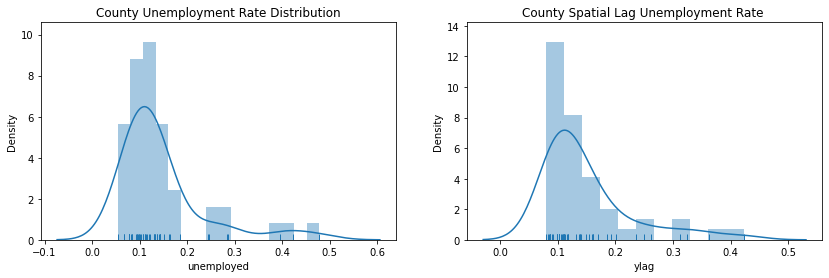

In [42]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sbn.distplot(new_df['unemployed'],rug=True,ax=ax[0])
ax[0].set_title('County Unemployment Rate Distribution')
sbn.distplot(new_df['ylag'],rug=True,ax=ax[1])
ax[1].set_title('County Spatial Lag Unemployment Rate ')
plt.savefig('lagcounties')

## Global Spatial Autocorrelation


In [43]:
y=new_df['unemployed']
y.median()

0.115861

In [44]:
yb=y >y.median()
sum(yb)

23

In [45]:
yb=y>y.median()
labels=["0 Low","1 High"]
yb=[labels[i] for i in 1*yb]
unemployed['yb']=yb

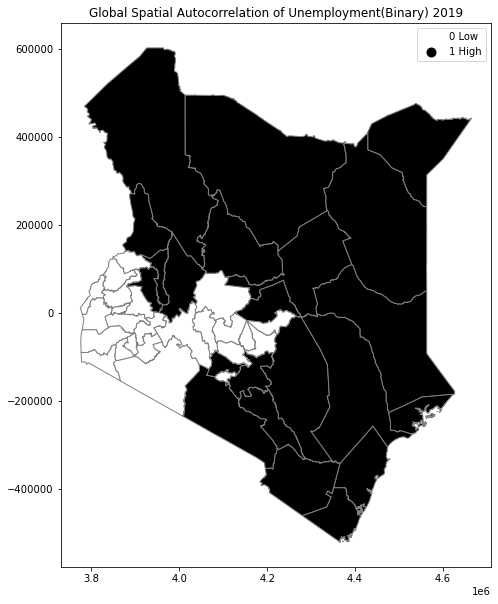

In [46]:
fig, ax=plt.subplots(figsize=(12,10),subplot_kw={'aspect':'equal'})
unemployed.plot(column='yb', cmap='binary',edgecolor='grey',legend=True,ax=ax)
ax.set_title('Global Spatial Autocorrelation of Unemployment(Binary) 2019')
plt.savefig('global autocorr')

## Spatial Autocorrelation
Relates to the combination of two types of similarity: spatial similarity and attribute similarity

## Spatial Similarity
We have already encountered spatial weights that are to be used to formalize the notion of spatial similarity by use of the Queen Based contiguity

In [47]:
wq = lp.weights.Queen.from_dataframe(new_df)
wq.transform='r'

## Attribute Similarity
so the spatial weight between counties i and j indicates if the two are neighbours geographically. We also need a measure of attribute similarity to pair up with this concept of spatial similarity.
The spatial Lag is derived variable that accomplishes this for us.

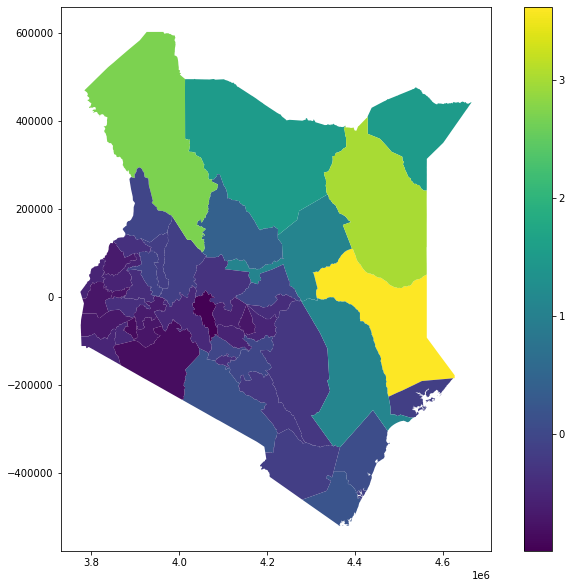

In [48]:
y=new_df['rate_std']
new_df.plot(column='rate_std', figsize=(12,10),legend=True)

In [49]:
ylag=lp.weights.lag_spatial(wq,y)


In [50]:
import esda
np.random.seed(12345)
mi=esda.moran.Moran(y,wq)
mi.I

0.6014632623796462

Text(0.5, 1.0, "Moran's I Plot of County Unemployment 2019")

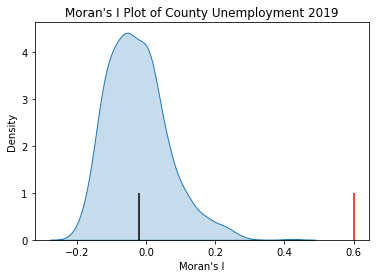

In [51]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I,0, 1, color='r')
plt.vlines(mi.EI, 0, 1)
plt.xlabel("Moran's I")
plt.savefig('Moran')
plt.title("Moran's I Plot of County Unemployment 2019")

In [52]:
mi.p_sim

0.001

In [53]:
#from splot.esda import plot_moran
#plot.moran(mi, zstandar=True, figsize=(10,4))
#plt.show()

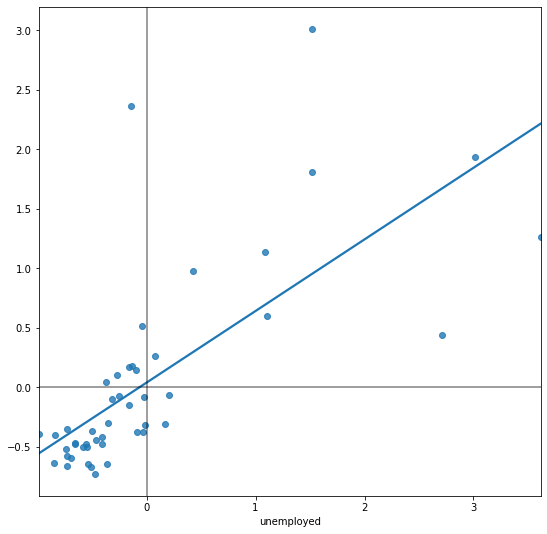

In [54]:
rate_std = (unemployed['unemployed'] - unemployed['unemployed'].mean()) / unemployed['unemployed'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
ylag_std=lp.weights.lag_spatial(wq,rate_std)
#merging on a new data frame
new_df = unemployed.assign(rate_std=rate_std)
# Setup the figure and axis 
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sbn.regplot(x=rate_std, y=ylag_std, ci=None) 
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5) 
plt.axhline(0, c='k', alpha=0.5)
# Display 
plt.show()

## Local Indicators of Spatial Autocorrelation

In [55]:
wq.transform='r'
lisa = esda.Moran_Local(rate_std,wq)

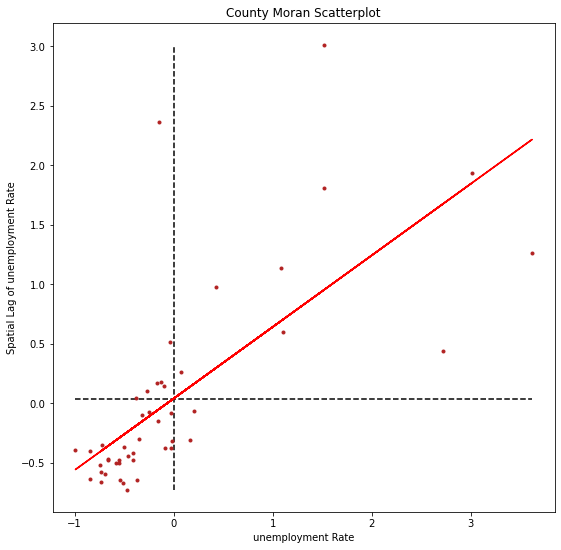

In [56]:
b, a=np.polyfit(y, ylag, 1)
f, ax=plt.subplots(1, figsize=(9, 9))

plt.plot(y, ylag, '.',color='firebrick')

plt.vlines(y.mean(),ylag.min(),ylag.max(), linestyle='--')
plt.hlines(ylag.mean(),y.min(),y.max(), linestyle='--')

plt.plot(y, a+b*y,'r')
plt.title('County Moran Scatterplot')
plt.ylabel('Spatial Lag of unemployment Rate')
plt.xlabel('unemployment Rate')
plt.savefig('moran I plot')

plt.show()

In [57]:
li=esda.moran.Moran_Local(y,wq)
li.q

array([2, 3, 3, 3, 3, 3, 1, 3, 1, 4, 3, 3, 3, 1, 3, 3, 3, 2, 4, 3, 2, 3,
       3, 1, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 1, 3, 3, 1, 3, 3,
       1, 2, 3])

In [58]:
(li.p_sim<0.05).sum()

19

In [59]:
sig=li.p_sim<0.05
hotspot=sig*li.q==1
coldspot=sig*li.q==2
doughnut=sig*li.q==3
diamond=sig*li.q==4

In [60]:
spots=['n.sig.','hot spot']
labels=[spots[i] for i in hotspot*1]

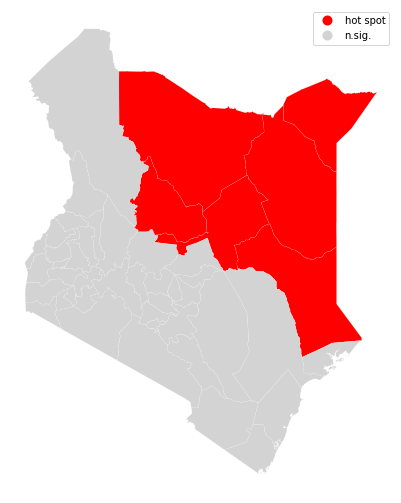

<Figure size 432x288 with 0 Axes>

In [61]:
unemployed=unemployed
from matplotlib import colors
hmap=colors.ListedColormap(['red','lightgrey'])
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.assign(cl=labels).plot(column='cl', categorical=True,\
k=2,cmap=hmap,linewidth=0.1,ax=ax,\
edgecolor='white',legend=True)
ax.set_axis_off()
plt.show()
plt.savefig('hotspot1')

In [62]:
spots=['n.sig.','cold  spot']
labels=[spots[i] for i in coldspot*1]

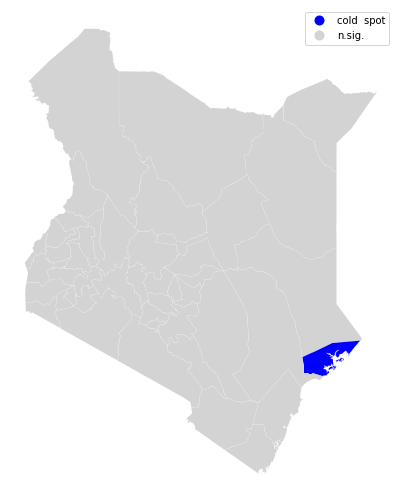

<Figure size 432x288 with 0 Axes>

In [63]:
unemployed=unemployed
from matplotlib import colors
hmap=colors.ListedColormap(['blue','lightgrey'])
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.assign(cl=labels).plot(column='cl', categorical=True,\
k=2,cmap=hmap,linewidth=0.1,ax=ax,\
edgecolor='white',legend=True)
ax.set_axis_off()
plt.show()
plt.savefig('coldspot1')

In [64]:
spots=['n.sig.','doughnut']
labels=[spots[i] for i in doughnut*1]

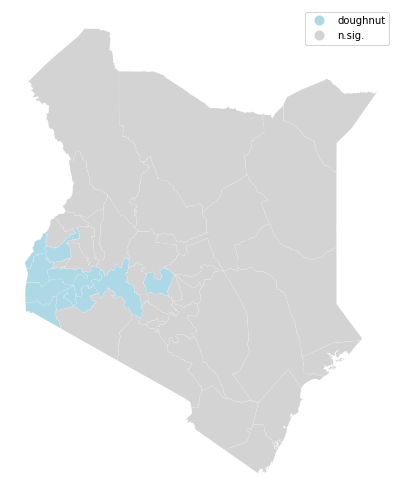

<Figure size 432x288 with 0 Axes>

In [65]:
unemployed=unemployed
from matplotlib import colors
hmap=colors.ListedColormap(['lightblue','lightgrey'])
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.assign(cl=labels).plot(column='cl', categorical=True,\
k=2,cmap=hmap,linewidth=0.1,ax=ax,\
edgecolor='white',legend=True)
ax.set_axis_off()
plt.show()
plt.savefig('doughnut1')

In [66]:
spots=['n.sig.','diamond']
labels=[spots[i] for i in diamond*1]

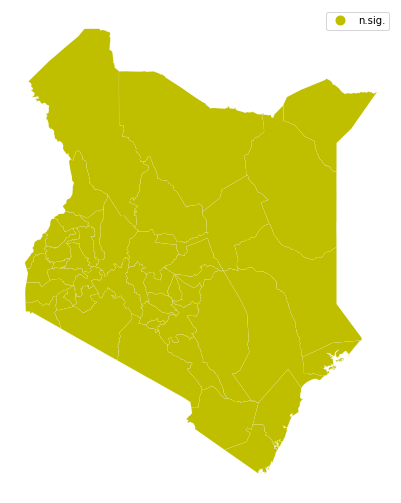

<Figure size 432x288 with 0 Axes>

In [67]:
unemployed=unemployed
from matplotlib import colors
hmap=colors.ListedColormap(['y','lightgrey'])
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.assign(cl=labels).plot(column='cl', categorical=True,\
k=2,cmap=hmap,linewidth=0.1,ax=ax,\
edgecolor='white',legend=True)
ax.set_axis_off()
plt.show()
plt.savefig('diamond1')

In [68]:
sig=1*(li.p_sim<0.05)
hotspot=1*(sig*li.q==1)
coldspot=3*(sig*li.q==2)
doughnut=2*(sig*li.q==3)
diamond=4*(sig*li.q==4)
spots=hotspot+coldspot+doughnut+diamond
spots

array([0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2])

In [69]:
spots_labels=['0 non significant','1 hotspot','2 doughnut','3 coldspot','4 diamond']
labels=[spots_labels[i] for i in spots]

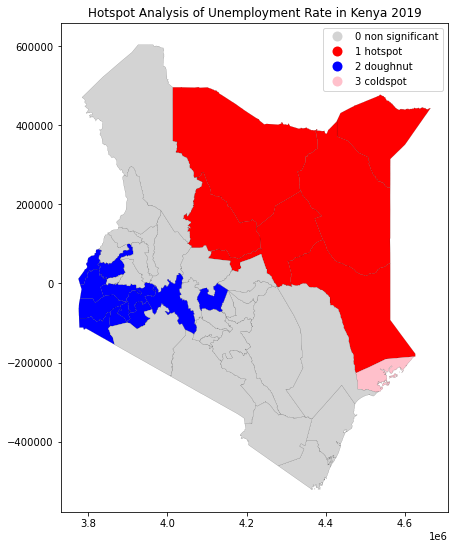

<Figure size 432x288 with 0 Axes>

In [70]:
from matplotlib import colors
hmap=colors.ListedColormap(['lightgrey','red','lightblue','blue','pink',])
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.assign(cl=labels).plot(column='cl', categorical=True,\
k=2,cmap=hmap,linewidth=0.1,ax=ax,\
edgecolor='k',legend=True)
plt.title("Hotspot Analysis of Unemployment Rate in Kenya 2019")
#ax.set_axis_off()
plt.show()
plt.savefig('LISA1')

## Clustering and Regionalisation

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [72]:
kmeans=KMeans(n_clusters=5)

In [73]:
import numpy
numpy.random.seed(0)
cluster_variables=['unemployed']
k5ls=kmeans.fit(unemployed[cluster_variables]) 

In [74]:
k5ls.labels_

array([0, 3, 3, 4, 0, 4, 1, 3, 2, 0, 4, 3, 0, 0, 3, 4, 4, 4, 0, 4, 0, 0,
       4, 2, 2, 0, 4, 0, 4, 4, 4, 3, 3, 3, 4, 0, 3, 0, 2, 4, 4, 1, 0, 3,
       1, 0, 4])

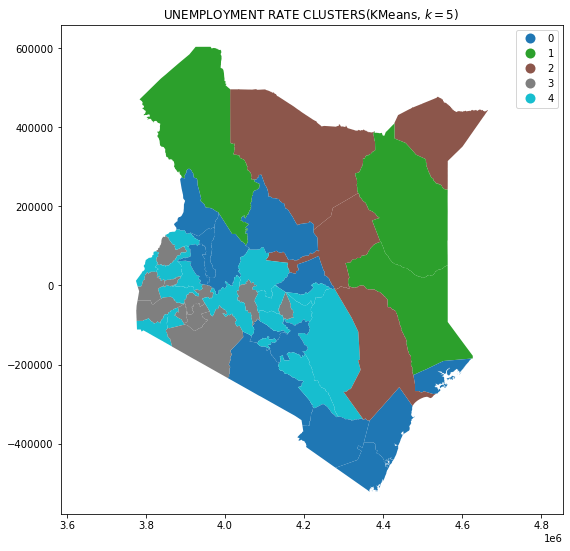

<Figure size 432x288 with 0 Axes>

In [75]:
unemployed['k5ls']=k5ls.labels_
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.plot(column='k5ls',categorical=True, legend=True, linewidth=0, ax=ax)
#ax.set_axis_off()
plt.axis('equal')
plt.title("UNEMPLOYMENT RATE CLUSTERS(KMeans, $k=5$) ")
plt.show()
plt.savefig('means')

In [76]:
k5size=unemployed.groupby('k5ls').size()
k5size

k5ls
0    14
1     3
2     4
3    10
4    16
dtype: int64

In [77]:
k5means=unemployed.groupby('k5ls')[cluster_variables].mean()

In [78]:
k5means.T

k5ls              0         1         2         3         4
unemployed  0.14526  0.431924  0.265637  0.075214  0.105448

In [79]:
import numpy
numpy.random.seed(0)

In [80]:
ward5=AgglomerativeClustering(linkage='ward', n_clusters=5)
ward5.fit(unemployed[cluster_variables])
unemployed['ward5']=ward5.labels_

In [81]:
ward5sizes=unemployed.groupby('ward5').size()
ward5sizes

ward5
0     3
1    14
2     4
3    16
4    10
dtype: int64

In [82]:
ward5=unemployed.groupby('ward5')[cluster_variables].mean()
ward5.T

ward5              0        1         2         3         4
unemployed  0.431924  0.14526  0.265637  0.105448  0.075214

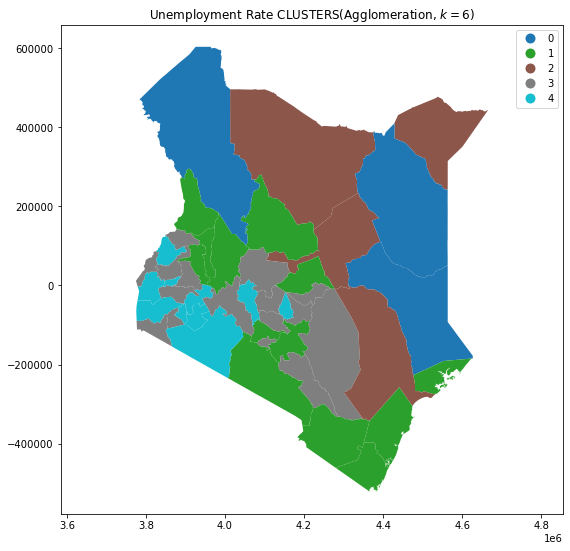

<Figure size 432x288 with 0 Axes>

In [83]:
f, ax=plt.subplots(1, figsize=(9,9))
unemployed.plot(column='ward5',categorical=True, legend=True, linewidth=0, ax=ax)
#ax.set_axis_off()
plt.axis('equal')
plt.title("Unemployment Rate CLUSTERS(Agglomeration, $k=6$) ")
plt.show()
plt.savefig('AGH')

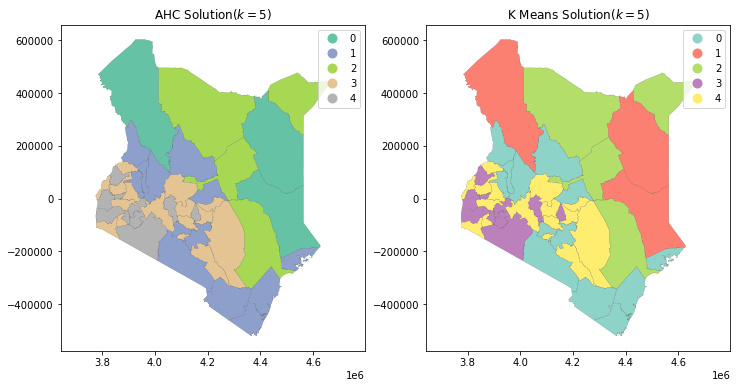

<Figure size 432x288 with 0 Axes>

In [84]:
f, axs=plt.subplots(1,2, figsize=(12,6))
ax=axs[0]
unemployed.plot(column='ward5', categorical=True,edgecolor='k' ,cmap='Set2',
               legend=True,linewidth=0.1,ax=ax)
#ax.set_axis_off()
ax.axis('equal')
ax.set_title('AHC Solution($k=5$)')

ax=axs[1]
unemployed.plot(column='k5ls', categorical=True, edgecolor='k',cmap='Set3',
               legend=True,linewidth=0.1,ax=ax)
#ax.set_axis_off()
ax.axis('equal')
ax.set_title('K Means Solution($k=5$)')

plt.show()
plt.savefig('clusters')
plt.savefig('AGHKMEANS')

In [85]:
numpy.random.seed(123456)
wq = lp.weights.Queen.from_dataframe(unemployed)
wq.transform='r'
model=AgglomerativeClustering(linkage='ward',
                             connectivity=wq.sparse,
                             n_clusters=4)
model.fit(unemployed[cluster_variables])

AgglomerativeClustering(connectivity=<47x47 sparse matrix of type '<class 'numpy.float64'>'
	with 244 stored elements in Compressed Sparse Row format>,
                        n_clusters=4)

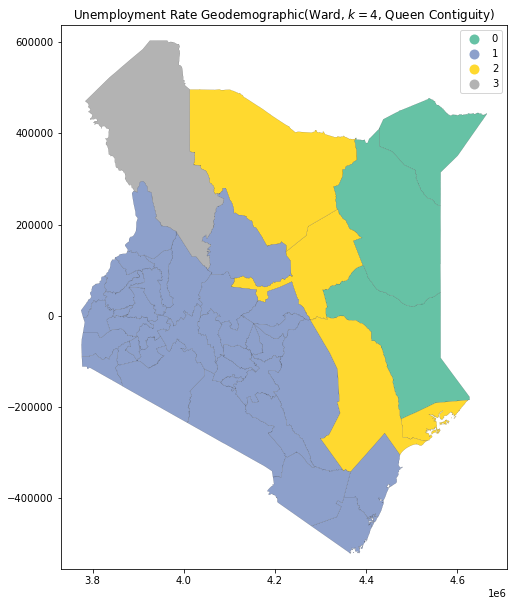

<Figure size 432x288 with 0 Axes>

In [86]:
unemployed['wardSwq']=model.labels_
f, ax=plt.subplots(1, figsize=(8,10))
unemployed.plot(column='wardSwq', categorical=True, cmap='Set2',
               legend=True,edgecolor='k',linewidth=0.1,ax=ax)
#ax.set_axis_off()
ax.axis('equal')
ax.set_title('Unemployment Rate Geodemographic(Ward, $k=4$, Queen Contiguity)')

plt.show()
plt.savefig('AHCREGIONS')

## Geographical Weighted Regression

In [88]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

In [102]:
#Prepare Kenya dataset inputs
g_y = new_df['unemployed'].values.reshape((-1,1))
g_X = new_df[['Edu_Attain', 'Farming','laborf' ]].values
u = new_df['x']
v = new_df['y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [103]:
#Calibrate GWR model

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

32.0


In [104]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                  47
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             17.706
Log-likelihood:                                                     -43.748
AIC:                                                                 95.496
AICc:                                                                98.960
BIC:                                                               -147.850
R2:                                                                   0.623
Adj. R2:                                                              0.597

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------